### 1. Calculating $P_{N}^{(L)}$

In [24]:
import numpy as np
import random

def lagrange_polinom(N, x, f, values):
    
    ans = []
    for t in values:
        s = 0
        for k in xrange(N + 1):
            tmp = f[k]
            for l in xrange(N + 1):
                if k != l:
                    tmp *= ( t - x[l] ) / ( x[k] - x[l] )
            s += tmp
        ans.append(s)
    
    return ans

### 2. Calculating $P_{N}^{(N)}$ 

In [25]:
# Calculating divided differences
def calculate_div_dif(N, x, f):
    
    f_div = [f]
    for i in xrange(1, N + 1):
        f_div.append([])
        for j in xrange(0, N + 1 - i):
            f_div[i].append( ( f_div[i - 1][j + 1] - f_div[i - 1][j] ) / ( x[j + i] - x[j] ) )
            
    return f_div

# Calculating the answer
def newton_polinom(N, x, f_div, values):
    
    ans = []
    for t in values:
        tmp = 0
        mul = 1
        for i in xrange(N + 1):
            
            if i - 1 >= 0:
                mul *= t - x[i - 1]
                
            tmp += f_div[i][0] * mul
        
        ans.append(tmp)
    
    return ans

### 3. Calculating $S_{3}$

In [42]:
def calculate_step(N, x):
    return min([ ( x[i + 1] - x[i] ) / float(10) for i in xrange(N) ])

def tridiag_system_solve(N, a, c, b, d):
    p = [c[0]] + [0] * (N - 1)
    q = [d[0]] + [0] * (N - 1)
    for i in xrange(1, N):
        p[i] = c[i] - a[i-1] * b[i-1] / p[i-1]
        q[i] = d[i] - a[i-1] * q[i-1] / p[i-1]  

    M = [0] * (N - 1) + [q[N-1] / p[N-1]] 
    for i in reversed(xrange(0, N-1)):
        M[i] = (q[i] - b[i] * M[i+1]) / p[i]
    
    return M

def get_spline_coefficients(N, x, f):
    a = f
    c = [0] + tridiag_system_solve(N - 2, [(x[i+1] - x[i]) for i in xrange(1, N-2)],
        [ 2 * (x[i+2] - x[i]) for i in xrange(0, N-2)],
        [x[i+2] - x[i+1] for i in xrange(0, N-3)],
        [6 * ((f[i+2] - f[i+1])/ (x[i+2] - x[i+1]) - (f[i+1] - f[i])/(x[i+1] - x[i])) for i in xrange(0, N-2)])+[0]
    d = [0] + [(c[i] - c[i-1]) / (x[i] - x[i-1]) for i in xrange(1, N)]
    b = [0] + [(f[i+1] - f[i]) / (x[i+1] - x[i]) + (x[i+1] - x[i]) * (2 * c[i+1] + c[i]) / 6 for i in xrange(0, N-1)]
    return [a[1:], b[1:], c[1:], d[1:]]
   
def calculate_spline(N, a, b, c, d, x, h):
    ans = []
    #points = []
    E = 1e-5
    for i in xrange(N):
        t = x[i]
        while abs(t - x[i+1]) > E:
            #points.append(t)
            dx = t - x[i+1]
            ans.append(a[i] + b[i] * dx + c[i] / 2 * dx**2 + d[i] / 6 * dx**3)
            t += h
            
    #points.append(x[N])
    ans.append(a[N-1])
    #points = [ round(i, 2) for i in points ]
    #print points, len(points)
    return ans

### 4. Getting data from file

In [27]:
f_in = open("data.txt", "r")

N = int(f_in.readline()) - 1
x = []
f = []

for line in f_in:
    tmp = line.split(' ')
    x.append(float(tmp[0]))
    f.append(float(tmp[1]))
print N, "\n", x, "\n", f

3 
[1.0, 5.0, 7.0, 8.0] 
[2.0, 2.0, 8.0, 10.0]


### 4*. Generating data

In [44]:
N = random.randint(4, 16)

x = [0] * (N + 1)
x[0] = random.randint(-32, 32)
for i in xrange(1, N+1):
    x[i] = random.randint(1, 3) + x[i-1]
    
f = [ random.randint(-16, 16) for i in xrange(N+1) ]
print x, len(x)
print f, len(f)

[-6, -4, -1, 2, 5, 7, 8, 9, 12, 14, 15] 11
[9, 15, 11, -2, 10, 8, -5, 15, -5, 7, 7] 11


### 4**. Generating by function

In [56]:
N = random.randint(4, 16)
x = np.ndarray(N+1)
x[0] = random.randint(-32, 32)
for i in xrange(1, N+1):
    x[i] = random.randint(1, 3) + x[i-1]
f = np.sin(x)
print x, len(x)
print f, len(f)

[  2.   4.   6.   9.  10.  11.  13.  16.  19.  20.  22.  24.  25.  28.  30.] 15
[ 0.90929743 -0.7568025  -0.2794155   0.41211849 -0.54402111 -0.99999021
  0.42016704 -0.28790332  0.14987721  0.91294525 -0.00885131 -0.90557836
 -0.13235175  0.27090579 -0.98803162] 15


### 5. Results

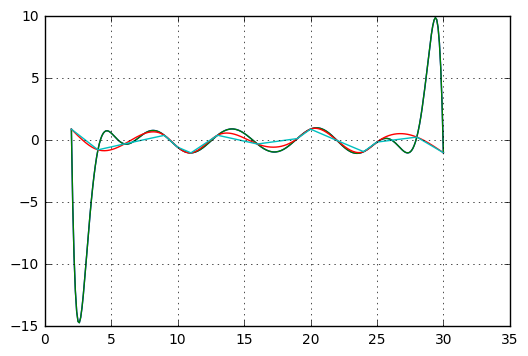

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

h = calculate_step(N, x)
points = np.arange(x[0], x[N]+0.001, h)
polinom_L = lagrange_polinom(N, x, f, points)
polinom_N = newton_polinom(N, x, calculate_div_dif(N, x, f), points)
sp_coef = get_spline_coefficients(N+1, x, f)

plt.plot(points, polinom_L, points, polinom_N, points, calculate_spline(N,
                                                                        sp_coef[0],
                                                                        sp_coef[1],
                                                                        sp_coef[2],
                                                                        sp_coef[3],
                                                                        x, h), x, f)
plt.grid(True)
plt.show()